In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
# Load Dataset (ethereum_price.csv)

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/ethereum_price.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.64,329.45,307.06,320.88,320.88,8.932500e+08
1,2017-11-10,320.67,324.72,294.54,299.25,299.25,8.859860e+08
2,2017-11-11,298.59,319.45,298.19,314.68,314.68,8.423010e+08
3,2017-11-12,314.69,319.15,298.51,307.91,307.91,1.613480e+09
4,2017-11-13,307.02,328.42,307.02,316.72,316.72,1.041890e+09


In [ ]:
# Load dataset (airline_passenger.csv)

df2 = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/airline_passengers.csv')
df2.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Question No. 1
# What is the final expanded mean 'Close' price _____ with 30 day window?

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Expanding_Mean_Close'] = df['Close'].expanding(min_periods=30).mean()
final_expanding_mean_close = df['Expanding_Mean_Close'].iloc[-1]

print(f"The final expanded mean 'Close' price with a 30-day window is: {final_expanding_mean_close}")


The final expanded mean 'Close' price with a 30-day window is: 1522.6199586776859


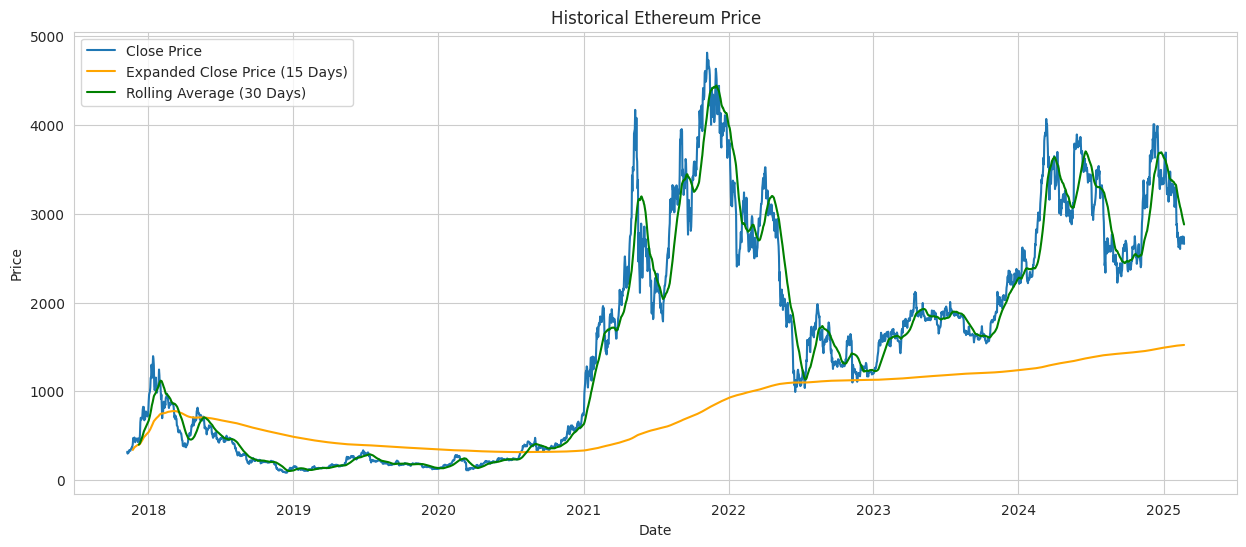

In [ ]:
# Question No. 2
# Project the graph below with (15, 6 size)

# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Expanding_Mean_Close_15'] = df['Close'].expanding(min_periods=15).mean()
df['Rolling_Mean_Close_15'] = df['Close'].rolling(window=30).mean()

# Set the figure size
plt.figure(figsize=(15, 6))

plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Expanding_Mean_Close_15'], color='orange', label='Expanded Close Price (15 Days)')
plt.plot(df['Date'], df['Rolling_Mean_Close_15'], color='green', label='Rolling Average (30 Days)')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Ethereum Price')

plt.grid(True)
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Question No 3
# Based on the graph above what can you generalize about etherium price?


In [ ]:
# Question No 4
# What is the highest and lowest 'Close' Prices from 2022 to 2024 only based on data?

df['Date'] = pd.to_datetime(df['Date'])
df_2022_to_2024 = df[(df['Date'].dt.year >= 2022) & (df['Date'].dt.year <= 2024)]
highest_close = df_2022_to_2024['Close'].max()
lowest_close = df_2022_to_2024['Close'].min()

print(f"Highest 'Close' Price (2022-2024): {highest_close}")
print(f"Lowest 'Close' Price (2022-2024): {lowest_close}")

Highest 'Close' Price (2022-2024): 4066.45
Lowest 'Close' Price (2022-2024): 993.64


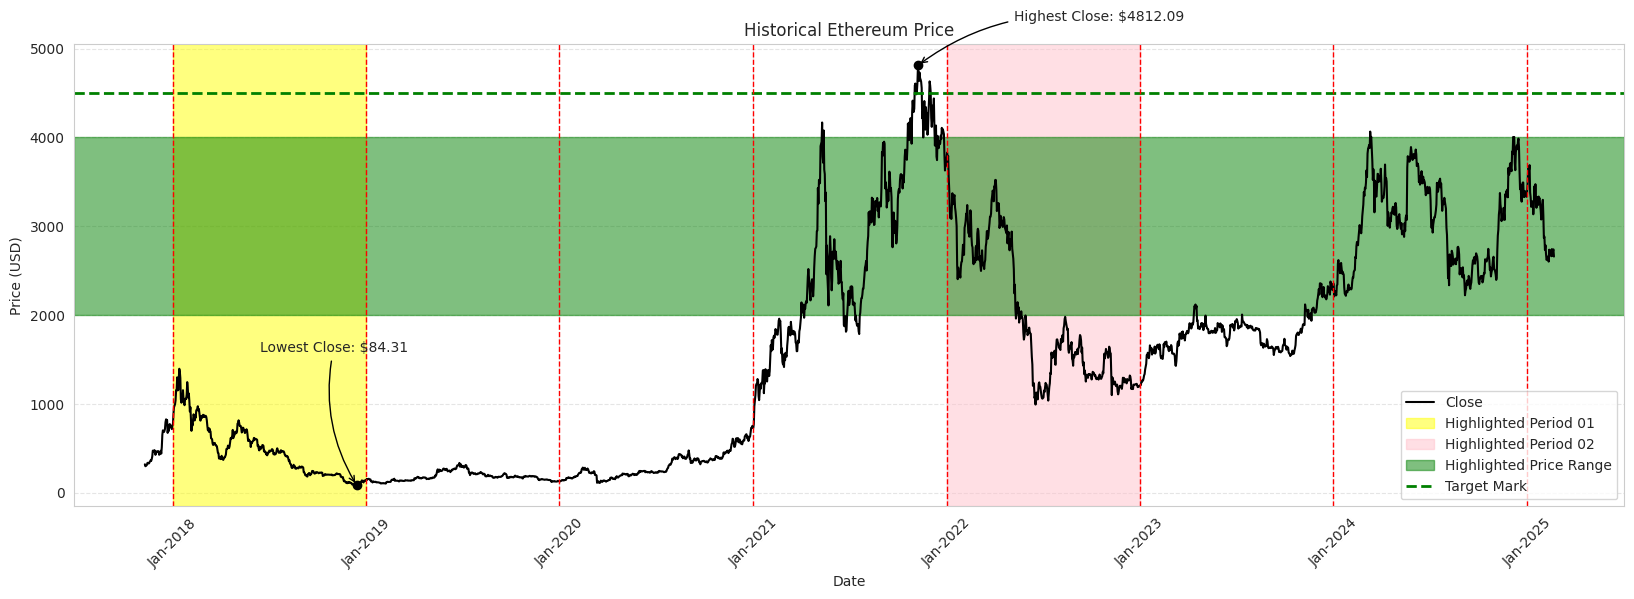

In [ ]:
# Question No 5
# Project the graph with (20, 6) size and 99% similarity, colors should be similar but not exact.
df = pd.read_csv(
    "https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/ethereum_price.csv"
)

df["Date"] = pd.to_datetime(df["Date"])

fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(df["Date"], df["Close"], color="black", label="Close")

highlighted_periods = [
    ("2018-01-01", "2019-01-01", "yellow", "Highlighted Period 01"),
    ("2022-01-01", "2023-01-01", "pink", "Highlighted Period 02"),
]

for start, end, color, label in highlighted_periods:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.5, label=label)

ax.axhspan(2000, 4000, color="green", alpha=0.5, label="Highlighted Price Range")

highest_close = df["Close"].max()
highest_date = df.loc[df["Close"].idxmax(), "Date"]
lowest_close = df["Close"].min()
lowest_date = df.loc[df["Close"].idxmin(), "Date"]

def annotate_point(ax, date, price, label, offset_months, offset_price):
    ax.scatter(date, price, color="black", marker="o")
    ax.annotate(
        f"{label}: ${price:.2f}",
        xy=(date, price),
        xytext=(date + pd.DateOffset(months=offset_months), price + offset_price),
        textcoords="data",
        arrowprops=dict(arrowstyle="->", color="black", connectionstyle="arc3,rad=0.2"),
        fontsize=10,
    )

annotate_point(ax, highest_date, highest_close, "Highest Close", 6, 500)
annotate_point(ax, lowest_date, lowest_close, "Lowest Close", -6, 1500)

ax.axhline(y=4500, color="green", linestyle="dashed", linewidth=2, label="Target Mark")

for year in range(2018, 2026):
    ax.axvline(pd.to_datetime(f"{year}-01-01"), color="red", linestyle="dashed", linewidth=1)

ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
ax.set_title("Historical Ethereum Price")
ax.legend()

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))

plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

<ipython-input-430-9b6ea3f5e863>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Close'].resample('M').mean()


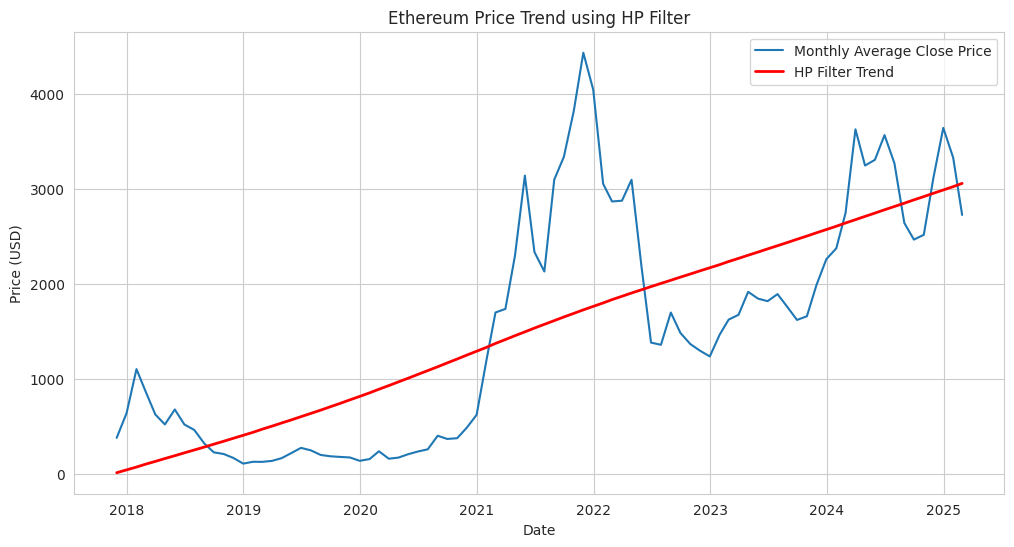

Date
2017-11-30      12.923591
2017-12-31      42.737861
2018-01-31      72.554962
2018-02-28     102.382333
2018-03-31     132.235372
                 ...     
2024-10-31    2919.772717
2024-11-30    2954.555019
2024-12-31    2989.339374
2025-01-31    3024.120949
2025-02-28    3058.899959
Freq: ME, Name: Close_trend, Length: 88, dtype: float64


In [ ]:
# Question No. 6
# Using HP-Filter resample to monthly (Month End) mean, what is the trend of Ethereum Close Pricing?
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/ethereum_price.csv')
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')

monthly_df = df['Close'].resample('M').mean()

cycle, trend = hpfilter(monthly_df, lamb=129600)

result_df = pd.DataFrame({'Original': monthly_df, 'Trend': trend})

plt.figure(figsize=(12, 6))
plt.plot(result_df['Original'], label='Monthly Average Close Price')
plt.plot(result_df['Trend'], label='HP Filter Trend', linewidth=2, color='red')
plt.title('Ethereum Price Trend using HP Filter')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print(trend)

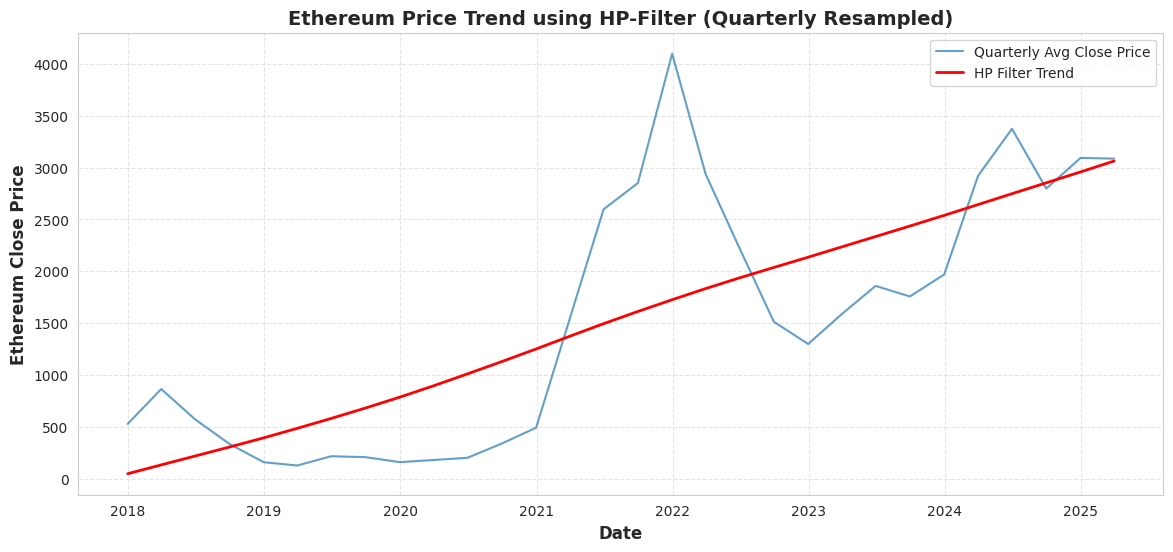

In [ ]:
# Question No 7
# Using HP-Filter resample quarterly (Quarter End) mean, what is the trend of Ethereum Close Pricing?

import statsmodels.api as sm

url = "https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/ethereum_price.csv"
df = pd.read_csv(url, index_col='Date', parse_dates=True)

df_quarterly = df['Close'].resample('QE').mean()

cycle, trend = sm.tsa.filters.hpfilter(df_quarterly, lamb=1600)

plt.figure(figsize=(14,6))
plt.plot(df_quarterly, label='Quarterly Avg Close Price', color='#1f77b4', alpha=0.7)
plt.plot(trend, label='HP Filter Trend', color='red', linewidth=2)

plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Ethereum Close Price', fontsize=12, fontweight='bold')
plt.title('Ethereum Price Trend using HP-Filter (Quarterly Resampled)', fontsize=14, fontweight='bold')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

<ipython-input-432-b5c35e767f37>:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df2["Thousands of Passengers"].resample("Q").mean()


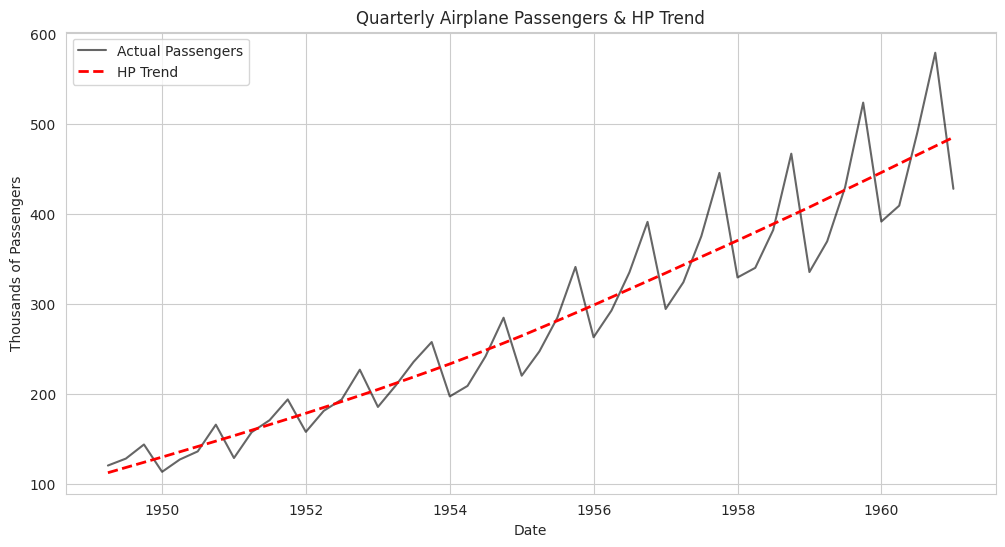

In [ ]:
# Question No 8
# Using HP-Filter resample to quarterly (Quarter End) mean, what is the trend of Airplane Passengers?

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df2 = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

df2.rename(columns={"Passengers": "Thousands of Passengers"}, inplace=True)

df_quarterly = df2["Thousands of Passengers"].resample("Q").mean()

cycle, trend = hpfilter(df_quarterly, lamb=1600)

plt.figure(figsize=(12, 6))
plt.plot(df_quarterly, label="Actual Passengers", color="black", alpha=0.6)
plt.plot(trend, label="HP Trend", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Thousands of Passengers")
plt.title("Quarterly Airplane Passengers & HP Trend")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-433-b2ed3786cb56>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2_monthly = df2["Thousands of Passengers"].resample("M").mean()


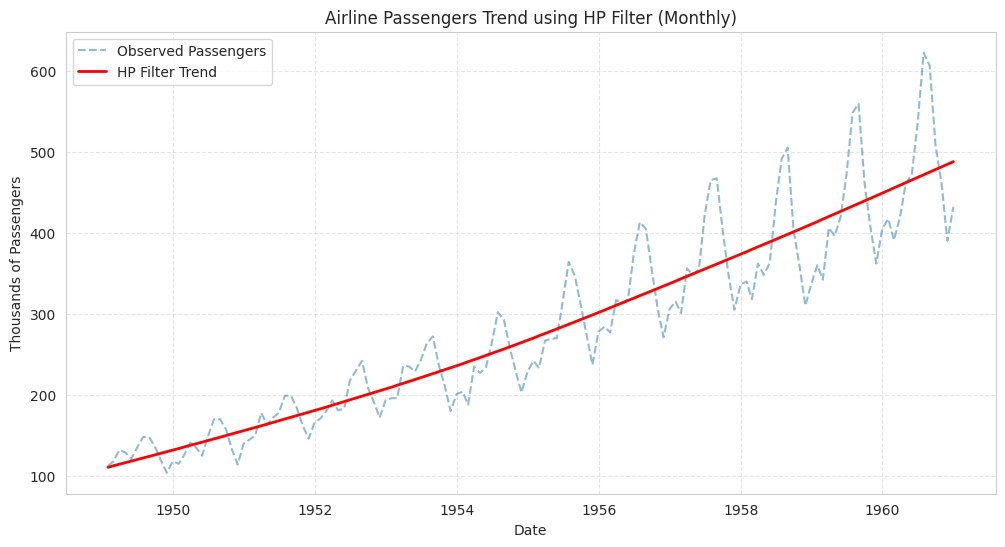

In [ ]:
# Question No 9
# Using HP-Filter resample to monthly (Month End) mean, what is the trend of Airline Passengers?

df2_monthly = df2["Thousands of Passengers"].resample("M").mean()

cycle, trend = sm.tsa.filters.hpfilter(df2_monthly, lamb=129600)

plt.figure(figsize=(12, 6))
plt.plot(df2_monthly, label="Observed Passengers", linestyle="--", alpha=0.5)
plt.plot(trend, label="HP Filter Trend", color="red", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Thousands of Passengers")
plt.title("Airline Passengers Trend using HP Filter (Monthly)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

<ipython-input-434-361269cc1453>:14: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly_eth = df_eth.resample('BM').mean()
<ipython-input-434-361269cc1453>:15: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly_airline = df_airline.resample('BM').mean()


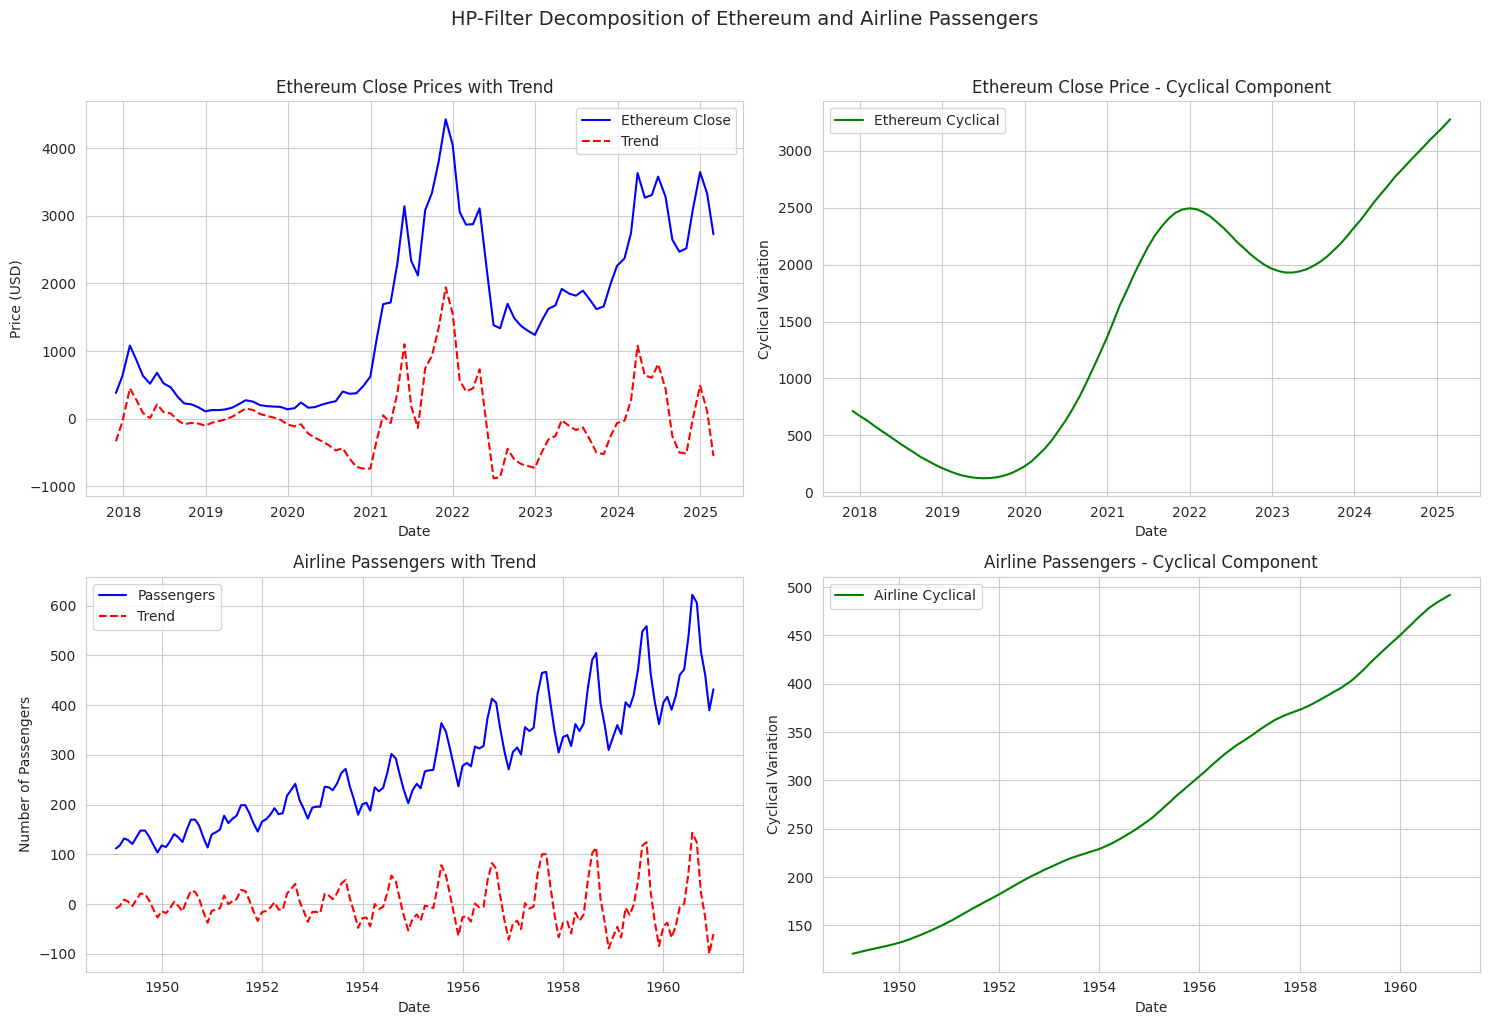

In [ ]:
# Question 10
# Using HP-Filter what can you infer about the cycles of Ethereum Price and Airline Passengers, if resampled to monthly (monthly end) mean?
url_eth = "https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/ethereum_price.csv"
url_airline = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

df_eth = pd.read_csv(url_eth)
df_eth['Date'] = pd.to_datetime(df_eth['Date'])
df_eth.set_index('Date', inplace=True)

df_airline = pd.read_csv(url_airline)
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline.set_index('Month', inplace=True)

monthly_eth = df_eth.resample('BM').mean()
monthly_airline = df_airline.resample('BM').mean()

eth_close = monthly_eth['Close']
airline_passengers = monthly_airline['Passengers']

trend_eth, cyclical_eth = hpfilter(eth_close, lamb=1600)
trend_airline, cyclical_airline = hpfilter(airline_passengers, lamb=1600)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('HP-Filter Decomposition of Ethereum and Airline Passengers', y=1.02, fontsize=14)

# Ethereum Plots
# Original vs Trend
axes[0, 0].plot(eth_close.index, eth_close, label='Ethereum Close', color='blue')
axes[0, 0].plot(trend_eth.index, trend_eth, label='Trend', color='red', linestyle='--')
axes[0, 0].set_title('Ethereum Close Prices with Trend')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price (USD)')
axes[0, 0].legend()

# Cyclical Component
axes[0, 1].plot(cyclical_eth.index, cyclical_eth, label='Ethereum Cyclical', color='green')
axes[0, 1].set_title('Ethereum Close Price - Cyclical Component')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cyclical Variation')
axes[0, 1].legend()

# Airline Plots
# Original vs Trend
axes[1, 0].plot(airline_passengers.index, airline_passengers, label='Passengers', color='blue')
axes[1, 0].plot(trend_airline.index, trend_airline, label='Trend', color='red', linestyle='--')
axes[1, 0].set_title('Airline Passengers with Trend')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Number of Passengers')
axes[1, 0].legend()

# Cyclical Component
axes[1, 1].plot(cyclical_airline.index, cyclical_airline, label='Airline Cyclical', color='green')
axes[1, 1].set_title('Airline Passengers - Cyclical Component')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Cyclical Variation')
axes[1, 1].legend()

plt.tight_layout()

plt.show()